In [1]:
# libraries
using Flux, Flux.Data.MNIST   # the julia ml library
using Images                  # image processing and machine vision for julia
using MLJ                     # make_blobs

using LinearAlgebra    # pinv pseudo-inverse matrix
using Metrics          # r2-score
using Random
using StatsBase        # standardize (normalization)
using Distributions

using Plots; gr()
using Printf

using CSV
using DataFrames


In [12]:
# load mnist from Flux
labels = MNIST.labels()
images = MNIST.images()
length(images), length(labels)


(60000, 60000)

,,,,

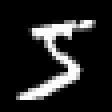
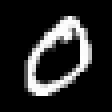
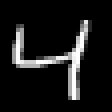
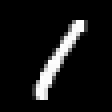
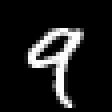

1×5 Adjoint{Int64,Array{Int64,1}}:
 5  0  4  1  9

In [13]:
# trainset/testset
imagesTrainOriginal = images[1:50000]
imagesTestOriginal  = images[50001:60000]

labelsTrainOriginal = labels[1:50000]
labelsTestOriginal  = labels[50001:60000]

display(imagesTrainOriginal[1:5])
labelsTrainOriginal[1:5]'

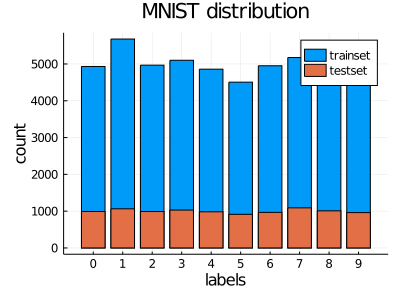

In [17]:
# check for unique labels
l = unique(labels)
sort!(l)

# distribution of labels
c1 = countmap(labelsTrainOriginal)
x1 = [i for i in keys(c1)]
y1 = [i for i in values(c1)]

p1 = bar(x1, y1, xticks = l, label = "trainset")
p1 = bar!(xlabel = "labels", ylabel = "count", title = "MNIST distribution", size=(400,300))

c2 = countmap(labelsTestOriginal)
x2 = [i for i in keys(c2)]
y2 = [i for i in values(c2)]

p2 = bar!(x2, y2, label = "testset")
p2 = bar!(xlabel = "labels", ylabel = "count")